<h2><center>ASSIGNMENT 4</center></h2>
<h2><center>DEEP ASHISH JARIWALA, JAYDEEP SINGH</center></h2>
<h2><center>GROUP - 41</center></h2>
<h2><center>Q: CM4</center></h2>

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from numpy.random import seed
seed(0)
tf.random.set_seed(0)

### IMPORTING DATASET

In [2]:
dataset = np.load('fashion_mnist_dataset_train.npy', allow_pickle=True)
data_dict = np.array(dataset)

values = data_dict[()]['features']
labels = data_dict[()]['target']

features = []
for i in range(60000):
    features.append(values[i].flatten())
features = np.array(features)

final_features = pd.DataFrame(features)
final_features

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.258824,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0


### EXPLORATORY DATA ANALYSIS

Label assigned for dress:  1.0
Label assigned for t-shirt:  1.0
Label assigned for bag:  5.0
Label assigned for coat:  4.0
Label assigned for sneaker:  5.0
Label assigned for trouser:  1.0
Label assigned for bag:  5.0
Label assigned for sandal:  5.0
Label assigned for t-shirt:  1.0
Label assigned for boots:  4.0
Label assigned for pant:  2.0
Label assigned for shirt:  4.0


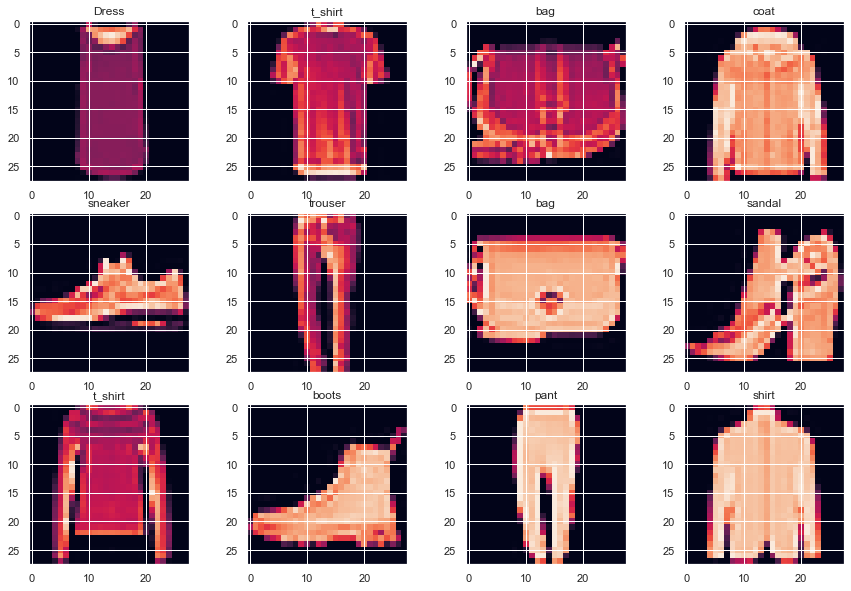

In [3]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
plt.title("Dress")
image = features[2,:].reshape((28,28))
plt.imshow(image)
print("Label assigned for dress: ", labels[2])

plt.subplot(3,4,2)
plt.title("t_shirt")
image = features[789,:].reshape((28,28))
plt.imshow(image)
print("Label assigned for t-shirt: ", labels[789])

plt.subplot(3,4,3)
plt.title("bag")
image = features[1578,:].reshape((28,28))
plt.imshow(image)
print("Label assigned for bag: ", labels[1578])

plt.subplot(3,4,4)
plt.title("coat")
image = features[5000,:].reshape((28,28))
plt.imshow(image)
print("Label assigned for coat: ", labels[5000])

plt.subplot(3,4,5)
plt.title("sneaker")
image = features[7589,:].reshape((28,28))
plt.imshow(image)
print("Label assigned for sneaker: ", labels[7589])

plt.subplot(3,4,6)
plt.title("trouser")
image = features[15963,:].reshape((28,28))
plt.imshow(image)
print("Label assigned for trouser: ", labels[15963])

plt.subplot(3,4,7)
plt.title("bag")
image = features[19586,:].reshape((28,28))
plt.imshow(image)
print("Label assigned for bag: ", labels[19586])

plt.subplot(3,4,8)
plt.title("sandal")
image = features[22504,:].reshape((28,28))
plt.imshow(image)
print("Label assigned for sandal: ", labels[22504])

plt.subplot(3,4,9)
plt.title("t_shirt")
image = features[28056,:].reshape((28,28))
plt.imshow(image)
print("Label assigned for t-shirt: ", labels[28056])

plt.subplot(3,4,10)
plt.title("boots")
image = features[34869,:].reshape((28,28))
plt.imshow(image)
print("Label assigned for boots: ", labels[34869])

plt.subplot(3,4,11)
plt.title("pant")
image = features[38956,:].reshape((28,28))
plt.imshow(image)
print("Label assigned for pant: ", labels[38956])

plt.subplot(3,4,12)
plt.title("shirt")
image = features[45896,:].reshape((28,28))
plt.imshow(image)
print("Label assigned for shirt: ", labels[45896])

plt.show()

On doing the initial analysis of the data, we see that the dataset contains 60,000 images of size 28*28 pixel with a single channel. An interesting point to note here is that the dataset has labels different from the standard mnist dataset. Here we observe that images for sneaker and bag have been assigned same label, Also images for trouser, t-shirt and dress have same label.

### DATA PREPROCESSING AND SPLIT

Following tasks are performed as part of data preprocessing:
<ul>
<li>We perform one-hot encoding of the target variable so that it is processed properly by the Categorical cross entropy loss function of the tensorflow library</li>
<li>Also,we reshape our test and train data, to give it as input to our neural network.</li>
<li>We perform a split of 90-10 on the given dataset, such that 90% of the images are in training data and the remaining 10% are in the test data.</li>
</ul>



In [4]:
from sklearn.preprocessing import OneHotEncoder
labels = pd.DataFrame(labels, columns = ['output'])

categorical_cols = ['output']
encoder = OneHotEncoder(categories = "auto", handle_unknown="error", sparse = False)
encoded_labels = encoder.fit_transform(labels[categorical_cols])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, encoded_labels, test_size = 0.1, random_state = 0)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

<p>The data is split into train and test sets with training set comprising of 90% of the total values, and test set with 10% values. The input data is reshaped in the shape of (48000, 28, 28, 1) compatible to the input given to the conv2d layer.</p>

### CNN ARCHITECTURE

After trying various models for our CNN(model comparison in CM6), we selected the following design for our Convolutional Neural Network:

In [6]:
# Set up some params 
# Set up some params 
nb_epoch = 100      # number of epochs to train on
batch_size = 600    # training batch size
drop_rate_1 = 0.15  # Dropping Rate

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 96, kernel_size = 2, activation = 'relu', input_shape = [28,28,1]))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(Dropout(drop_rate_1))

cnn.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 4, activation = 'relu',))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

cnn.add(tf.keras.layers.Flatten())

#input layer and first hidden layer
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))


# second and third hidden layer
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 5, activation = 'softmax'))

In [7]:
# Compiling the model 
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# FIT METHOD TO TRAIN THE ANN ON TRAINING SET
filepath = 'best_model_2.wts.h5'

fitted_model = cnn.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.1, callbacks = [ tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

Epoch 1/100
81/81 [==============================] - 63s 773ms/step - loss: 1.2609 - accuracy: 0.5771 - val_loss: 1.4593 - val_accuracy: 0.6644

Epoch 00001: val_loss improved from inf to 1.45929, saving model to best_model_2.wts.h5
Epoch 2/100
81/81 [==============================] - 63s 776ms/step - loss: 0.4220 - accuracy: 0.8320 - val_loss: 1.4003 - val_accuracy: 0.8083

Epoch 00002: val_loss improved from 1.45929 to 1.40030, saving model to best_model_2.wts.h5
Epoch 3/100
81/81 [==============================] - 63s 781ms/step - loss: 0.3284 - accuracy: 0.8679 - val_loss: 1.2925 - val_accuracy: 0.8367

Epoch 00003: val_loss improved from 1.40030 to 1.29248, saving model to best_model_2.wts.h5
Epoch 4/100
81/81 [==============================] - 64s 790ms/step - loss: 0.2908 - accuracy: 0.8828 - val_loss: 1.1220 - val_accuracy: 0.8526

Epoch 00004: val_loss improved from 1.29248 to 1.12197, saving model to best_model_2.wts.h5
Epoch 5/100
81/81 [==============================] - 64s

In [41]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 27, 27, 96)        480       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 96)        384       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 256)       393472    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)             

The Main components of our CNN are:

#### 1. Layers:
A CNN primarily consists of 3 layers:
    <ol>
    <li>The convolutional layer : This layer is the first layer that is used to extract the various features from the input images.</li>
<li>The Pooling layer: The goal of this layer is to decrease the size of the convolved feature map to reduce the computational costs.</li>
<li>Fully Connected Layer: This layer essentially contains a feed forward neural network. These layers are usually placed before the output layer and form the last few layers of a CNN Architecture.</li>
</ol>

Our CNN model consists of the following layers:
<ul>
<li>Convolutional layer with 96 filters, kernel size = 2*2</li>
<li>Pooling layer with window size 2</li>
<li>Convolutional layer with 256 filters, kernel size = 4*4</li>
<li>Pooling layer with window size 2</li>
<li>Fully Connected Layer with 512 neurons</li>
<li>Fully Connected Layer with 256 neurons</li>
<li>Fully Connected Layer with 128 neurons</li>
<li>Output layer with 5 neurons</li>
</ul>
    <p>The total number of parameters in our CNN are 3,836,517. The main points of our CNN architecture are:</p>
1. We start by using smaller filters size(2x2), to collect as much information as possible and then we gradually increase the filter size(4x4) to reduce the generated feature space width to represent more global, high-level and representative information.<br>
2. We gradually increase the number of filters as we progress through the layers in the CNN. The intial Convolutional layer contains 96 filters and the subsequent layer contains 256 filters. The number of filters is increased to increase the depth of the feature space thus helping in learning more levels of global abstract structures.

#### 2. Activation Functions
Activation functions help the neural networks to learn complex patterns in the data. It takes in the output signal from the previous cell and converts it into some form that can be taken as input to the next cell. The most important feature of activation function is that it adds non-linearity to the model.
<p>
<li>After trying out different Activation functions for our model (Hyperparameter tuning details in CM6), we select ReLU activation function for our convolutional and fully connected layers. Compared to other activation functions like the sigmoid and tanh, the ReLU function offers much better performance and generalization in deep learning. The function is a nearly linear function that retains the properties of linear models, which makes them easy to optimize with gradient-descent methods.</li>
<li>The output layer uses the softmax activation function which will return the confidence scores of each class. This activation function is useful for multi-class classification as the scores returned by Softmax are essentially the probablities of different classes which add to 1.
</li>
</p>


#### 3. Pooling
The pooling operation involves sliding a two-dimensional filter over each channel of feature map and summarising the features lying within the region covered by the filter. Pooling is performed in neural networks to reduce variance and computation complexity. There are two types of pooling:
<ul>
    <li>Max pooling: It returns the maximum value from the portion of the image covered by the Kernel.</li>
    <li>Average pooling: It returns the average of all the values from the portion of the image covered by the Kernel.</li>
</ul>
Our model uses Max Pooling with a window size of 2, stride=2 and no paddings.


#### 4. Dropout
<p>Dropout is a regularization technique which helps in reducing overfitting by randomly selected nodes are dropped-out/ignored during training.</p>
<ul>
<li>Our model has a dropout layer between the two convolutional layers, and the dropout rate being used in 0.05. i.e, it will randomly set 5% of inputs to zero.
</li>
<li>We place the dropout layer after the Max-Pool layer. The placement done in this way upholds the definition of Dropout which while learning removes high dependency on small set of features. If placed before the Max-Pool layer the values removed by Dropout may not affect the output of the Max-Pool layer as it picks the maximum from a set of values, therefore only when the maximum value is removed can it be thought of removing a feature dependency.</li>
</ul>

#### 5. Batch Normalization
Batch normalization is a technique for training very deep neural networks that normalizes the contributions to a layer for every mini-batch. This has the impact of settling the learning process and drastically decreasing the number of training epochs required to train deep neural networks. Batch normalization also reduces the internal covariance shift.
<p>We are adding Batch Normalization layer in our model to standardize the input of the intermediate convolutional layers. This layer is added before the dropout layer.</p>

#### 6. Optimizer
Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. After trying out various optimizers during hyper-parameter tuning, we found that Adam optimer gives the best performance among the all.(Details in CM6).
<p> Adam optimizer works with the momentums of first and second order. The advantage of using Adam optimizer is that it is very fast and converges rapidly. It also rectifies the vanishing learning rate</p>


#### 7. Loss Function
As the problem statement is a multi-class classification, the loss function we are using is the categorical cross entropy. It expects one-hot encoded representation of the labels as input. In this loss function, each predicted class probability is compared to the actual class desired output 0 or 1 and a score/loss is calculated that penalizes the probability based on how far it is from the actual expected value.

#### 8. Early-stopping
A major issue with neural networks is the the number of training epochs to be used while training the model.Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and it continues to monitor the validation loss and automatically stops the training if there is no improvement in the model.
<p>Our model uses early stopping during the training phase and thus it stops training after 18 epochs. Here we are using patience as 10, i.e the model will stop when it sees no change in the the validation loss over 10 epochs.</p>

### RESULTS

#### ACCURACY VS EPOCHS PLOT

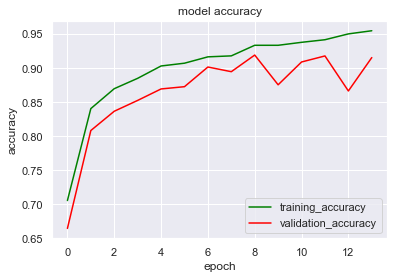

In [42]:
# summarize history for accuracy
plt.plot(fitted_model.history['accuracy'], c = 'green', label = 'training_accuracy')
plt.plot(fitted_model.history['val_accuracy'], c = 'red', label = 'validation_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

It is observed that over the initial few epochs, the training set accuracy witness a very rapid increase, and after about 14 epochs, the model becomes stable and there very small difference between the validitation and the training accuracies.
During the training process, the mean values of accuracies achieved on the training and the validation set are:

In [43]:
print("Mean val acc:", np.mean(fitted_model.history['val_accuracy']))
print("Mean train acc:", np.mean(fitted_model.history['accuracy']))

Mean val acc: 0.8646163940429688
Mean train acc: 0.8998927048274449


#### LOSS VS EPOCHS PLOT

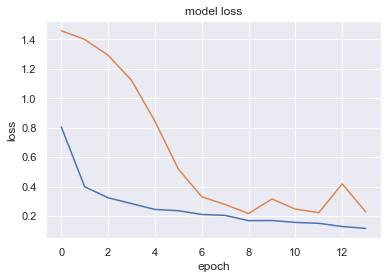

In [44]:
# summarize history for loss
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

It is observed that during the initial epochs, there is a huge gap between the training and validation loss. As the number of epochs increase, the difference between the training and validation losses keeps on decreasing. The mean values of the these losses during the training phase are: 

In [45]:
print("Mean val loss:", np.mean(fitted_model.history['val_loss']))
print("Mean train loss:", np.mean(fitted_model.history['loss']))

Mean val loss: 0.6349943290863719
Mean train loss: 0.25627167682562557


### RELOADING THE WEIGHTS OF TRAINED MODEL

In [8]:
# we re-load the best weights once training is finished
filepath = 'best_model_2.wts.h5'
cnn.load_weights(filepath)

In [9]:
y_pred = cnn.predict(X_test)

for i in range(0,len(y_pred)):
    temp = max(y_pred[i])
    for j in range(5):
        if y_pred[i][j] == temp:
            y_pred[i][j] = 1
        else:
            y_pred[i][j] = 0 
            
y_pred

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
true_values = []
for i in range(0, len(y_test)):
    for j in range(5):
        if y_test[i][j] == 1:
            if j == 0:
                true_values.append(1)
            elif j == 1:
                true_values.append(2)
            elif j == 2:
                true_values.append(3)
            elif j == 3:
                true_values.append(4)
            elif j == 4:
                true_values.append(5)

In [11]:
result = []
for i in range(0, len(y_pred)):
    for j in range(5):
        if y_pred[i][j] == 1:
            if j == 0:
                result.append(1)
            elif j == 1:
                result.append(2)
            elif j == 2:
                result.append(3)
            elif j == 3:
                result.append(4)
            elif j == 4:
                result.append(5)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
score =accuracy_score(true_values, result) 
print(f'The test set accuracy obtained: {score*100} %')

The test set accuracy obtained: 91.81666666666666 %


We observe that there our model gives an accuracy of 91.81% on the test set, which is very close to the accuracies obtained on the training and the validation sets.

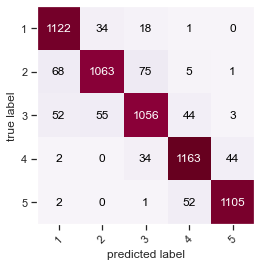

In [15]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

y_target = true_values
y_predicted = result

cm = confusion_matrix(y_target=y_target, y_predicted=y_predicted, binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm, cmap = 'PuRd' , class_names = ['1','2','3','4','5'])
plt.show()

<p>The plot above shows the confusion matrix for the CNN based classification model on fashion mnist dataset. It can be seen that labels '1' and '5' are classified at a better rate compared to other two classes. The highest error is observed in case of label '2' and '3' which have been misclassified as either '1', '2' or '3'. However, the model provides a good accuracy in classifing the outcome for covid patient with majority of the data classified properly.</p>